# Introduction to scientific computing with Python
*Maxime Sangnier*

September, 2023

## Part 6: A practical work about convex optimization

# Table of contents
1. [Exercises](#part1)
    - [Exercise 1](#part1sec1)
    - [Exercise 2](#part1sec2)


# Exercises <a id="part1"></a>
## Exercise 1 <a id="part1sec1"></a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_contour(Q, c):
    """
    Plot the contour of a quadratic function 1/2 x^T Q x + c^T x.
    
    Input:
        - Q: a 2x2 numpy array.
        - c: a numpy array of size 2.
    """
    f = lambda x: x.T.dot(Q.dot(x))/2 + c.dot(x)
    sol = np.linalg.solve(Q, -c)
    sol_x, sol_y = sol[0], sol[1]

    X, Y = np.meshgrid(np.linspace(-10+sol_x, 10+sol_x, 100), np.linspace(-10+sol_y, 10+sol_y, 100))
    X, Y = X.ravel(), Y.ravel()
    Z = np.asarray([f(np.r_[x, y]) for x, y in zip(X, Y)])

    X.shape = (int(np.sqrt(X.size)), -1)
    Y.shape = (int(np.sqrt(Y.size)), -1)
    Z.shape = (int(np.sqrt(Z.size)), -1)

    levels = np.logspace(0, np.log10(Z.max()-Z.min()), 20) + Z.min()
    plt.contour(X, Y, Z, levels)

def plot_path(p):
    """
    Plot the path [x_0, x_1, … x_k] of an optimization algorithm.
    
    Input:
        - p: a list of numpy arrays of size 2 (the points x_t, t \in [0, k]).
    """
    plt.plot([x for x, y in p], [y for x, y in p], '*-')

>Let us consider the optimization problem:
$$
    \operatorname{minimize}_{x \in \mathbb R ^d}
    \frac 1 2 x^\top Q x + c^\top x,
$$
where $Q$ is a symmetric positive definite matrix and $c$ a vector.
These parameters can be randomly generated (here in dimension 2):

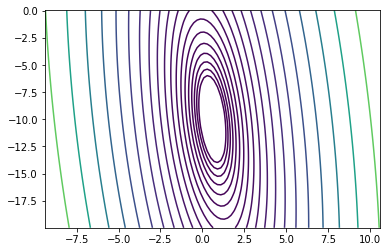

In [2]:
Q = np.random.randn(2, 2)
Q = Q.dot(Q.T)
c = np.random.randn(2)
c *= 10 / np.linalg.norm(np.linalg.solve(Q, -c))

plot_contour(Q, c)

>**Question 1.**
Define a function `gradient_descent(Q, c, n_it=None, eps=1e-3)` that:
- performs a gradient descent for the optimization problem of interest with fixed step size;
- terminates after `n_it` iterations or when the norm of the current gradient is less than `eps`;
- returns the list of iterates $(x_k)_k$.

>Plot the path of the descent.

In [ ]:
# Answer

>**Question 2.**
Let $L$ be the coefficient of Lipschitz-continuity of the gradient of the objective function.Try different step sizes between $\frac{0.1}{L}$ and $\frac{2.5}{L}$.
What do you observe?

In [ ]:
# Answer

>**Question 3.**
Implement a line search with Armijo's rule and compare the path obtained.

In [ ]:
# Answer

>**Question 4.**
Show that the exact line search boils down to $\gamma_k = \frac{\|v_k\|_2^2}{v_k^\top Q v_k}$, where $v_k$ is the gradient of the objective function at $x_k$.

>Implement a gradient descent with this step size and compare to both others.

In [ ]:
# Answer

>**Question 5.**
Compare with a Newton method.

In [ ]:
# Answer

## Exercise 2 <a id="part1sec2"></a>


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

>Let us consider the problem of least absolute deviations:
$$
    \operatorname{minimize}_{\beta \in \mathbb R ^d}
    \left\| Y - X\beta \right\|_1,
$$
where $Y \in \mathbb R^n$ and $X \in \mathbb R^{n \times d}$.

>The matrices $X$ and $Y$ can be randomly generated:

In [10]:
n, d = 200, 2  # Sample size, dimension

X = np.random.randn(n, d-1)
X = np.concatenate((X, np.ones((n, 1))), axis=1)  # Last column of 1 (intercept)

beta = np.random.randn(d)
# beta[1:-1] = 0  # Only the first and the last components are nonzero

Y = X.dot(beta) + np.random.randn(n)*5e-1

>**Question 1.**
Rewrite the previous optimization problem as a linear program.

**Answer:**
…

> Once the optimization problem is rewritten as a linear program, it can be solved with standard libraries such as `cvxopt` or `scipy`.

In [13]:
from scipy.optimize import linprog

# Variables: beta, t
c = np.r_[np.zeros(d), np.ones(n)]  # Linear objective
G = np.r_[np.c_[-X, -np.eye(n)],
          np.c_[X, -np.eye(n)]]  # Inequality lhs
h = np.r_[-Y, Y]  # Inequality rhs

sol = linprog(c, G, h, bounds=(None, None))

beta_sol = sol['x'][:d]
obj_sol = np.linalg.norm(Y - X.dot(beta_sol), ord=1)

print("Success:", sol['success'])
print("True beta:", beta)
print("Estimation of beta:", beta_sol)
print("Minimum objective:", obj_sol)

Success: True
True beta: [-1.27071248 -0.99699098]
Estimation of beta: [-1.2306907 -1.0145975]
Minimum objective: 85.6692654139222


>**Question 2.**
Scatter the observations and draw the linear model.
Add the predictions obtained from the estimator `beta_sol`.

In [ ]:
# Answer

>**Question 3.**
Define a function `subgradient_descent(Y, X, n_it=100, step=1., mode='fixed')` that:
- performs a subgradient descent for the original optimization problem (we note $g_k$ a subgradient at iteration $k$) with either
    - a fixed step length: $\frac{\textrm{step}}{\|g_{k}\|}$;
    - a $\sqrt \cdot$-diminishing step size: $\frac{\textrm{step}}{\sqrt k}$;
    - a linearly diminishing step size: $\frac{\textrm{step}}{k}$;
- terminates after `n_it` iterations;
- returns the list of iterates $(\beta_k)_k$.

>Run the algorithm for different fixed step lengths and plot, with respect to the iterations, the normalized objective values: $\frac{f(x_k) - \textrm{obj\_sol}}{\textrm{obj\_sol}}$ (use a y-log scale).

In [ ]:
# Answer

>**Question 4.**
Choose a value for `step` and compare the three ways of defining the step size (fixed length, $\sqrt \cdot$, linear) for a large number of iterations by plotting the objective values.
What do you observe?

In [ ]:
# Answer

>**Question 5.**
In the same manner as for the previous question, draw the norm of the difference between `beta_sol` and the iterates $(\beta_k)_k$ of the subgradient methods.

In [ ]:
# Answer